## Group By

In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa

### Introduction


In [2]:
df = pd.DataFrame([
    ["group_a", 0],
    ["group_a", 2],
    ["group_b", 1],
    ["group_b", 3],
    ["group_b", 5],
], columns=["group", "value"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,group,value
0,group_a,0
1,group_a,2
2,group_b,1
3,group_b,3
4,group_b,5


In [3]:
df.groupby("group").sum()

,value
group,
group_a,2
group_b,9


In [4]:
df.groupby("group").agg("sum")

,value
group,
group_a,2
group_b,9


In [5]:
df.groupby("group").transform("sum")

,value
0,2
1,2
2,9
3,9
4,9


In [6]:
df[["value"]].div(df.groupby("group").transform("sum"))

,value
0,0.0
1,1.0
2,0.111111
3,0.333333
4,0.555556


In [9]:
df.groupby("group", as_index=False).sum()

,group,value
0,group_a,2
1,group_b,9


In [10]:
df.groupby("group").min()

,value
group,
group_a,0
group_b,1


In [11]:
df.groupby("group").agg(sum_of_value=pd.NamedAgg(column="value", aggfunc="sum"))

,sum_of_value
group,
group_a,2
group_b,9


In [12]:
df.groupby("group").max()

,value
group,
group_a,2
group_b,5


In [13]:
df.groupby("group").agg("max")

,value
group,
group_a,2
group_b,5


In [14]:
df.groupby("group").transform("max")

,value
0,2
1,2
2,5
3,5
4,5


### Grouping and calculating multiple columns

In [16]:
df = pd.DataFrame([
    ["North", "Widget A", "Jan", 10, 2],
    ["North", "Widget B", "Jan", 4, 0],
    ["South", "Widget A", "Jan", 8, 3],
    ["South", "Widget B", "Jan", 12, 8],
    ["North", "Widget A", "Feb", 3, 0],
    ["North", "Widget B", "Feb", 7, 0],
    ["South", "Widget A", "Feb", 11, 2],
    ["South", "Widget B", "Feb", 13, 4],
], columns=["region", "widget", "month", "sales", "returns"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,region,widget,month,sales,returns
0,North,Widget A,Jan,10,2
1,North,Widget B,Jan,4,0
2,South,Widget A,Jan,8,3
3,South,Widget B,Jan,12,8
4,North,Widget A,Feb,3,0
5,North,Widget B,Feb,7,0
6,South,Widget A,Feb,11,2
7,South,Widget B,Feb,13,4


In [17]:
df.groupby("widget").sum()

,region,month,sales,returns
widget,,,,
Widget A,NorthSouthNorthSouth,JanJanFebFeb,32,7
Widget B,NorthSouthNorthSouth,JanJanFebFeb,36,12


In [18]:
df.groupby("widget")[["sales", "returns"]].agg("sum")

,sales,returns
widget,,
Widget A,32,7
Widget B,36,12


In [19]:
df.groupby("widget").agg(
    sales_total=pd.NamedAgg(column="sales", aggfunc="sum"),
    returns_total=pd.NamedAgg(column="returns", aggfunc="sum"),
)

,sales_total,returns_total
widget,,
Widget A,32,7
Widget B,36,12


In [20]:
df.groupby(["widget", "region"]).agg(
    sales_total=pd.NamedAgg("sales", "sum"),
    returns_total=pd.NamedAgg("returns", "sum"),
)

sales_total  returns_total
widget   region                            
Widget A North            13              2
         South            19              5
Widget B North            11              0
         South            25             12

In [21]:
df.groupby(["widget", "region"]).agg(
    sales_total=pd.NamedAgg("sales", "sum"),
    returns_total=pd.NamedAgg("returns", "sum"),
    sales_min=pd.NamedAgg("sales", "min"),
    returns_min=pd.NamedAgg("returns", "min"),
    sales_mean=pd.NamedAgg("sales", "mean"),
    returns_mean=pd.NamedAgg("returns", "mean"),
)

sales_total  returns_total  sales_min  returns_min  \
widget   region                                                       
Widget A North            13              2          3            0   
         South            19              5          8            2   
Widget B North            11              0          4            0   
         South            25             12         12            4   

                 sales_mean  returns_mean  
widget   region                            
Widget A North          6.5           1.0  
         South          9.5           2.5  
Widget B North          5.5           0.0  
         South         12.5           6.0

### Group by apply

In [28]:
df = pd.DataFrame([
    ["group_a", 42],
    ["group_a", 555],
    ["group_a", 42],
    ["group_a", 555],
    ["group_b", 0],
], columns=["group", "value"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,group,value
0,group_a,42
1,group_a,555
2,group_a,42
3,group_a,555
4,group_b,0


In [29]:
pd.Series(
    [42, 555, 0],
    index=pd.Index(["group_a", "group_a", "group_b"], name="group"),
    dtype=pd.Int64Dtype(),
)

group
group_a     42
group_a    555
group_b      0
dtype: Int64

In [30]:
def mode_for_apply(df: pd.DataFrame):
    return df["value"].mode()

df.groupby("group").apply(mode_for_apply, include_groups=False)

group     
group_a  0     42
         1    555
group_b  0      0
Name: value, dtype: Int64

In [31]:
def mode_for_apply(df: pd.DataFrame):
    print(f"\nThe data passed to apply is:\n{df}")
    return df["value"].mode()

df.groupby("group").apply(mode_for_apply, include_groups=False)


The data passed to apply is:
   value
0     42
1    555
2     42
3    555

The data passed to apply is:
   value
4      0


group     
group_a  0     42
         1    555
group_b  0      0
Name: value, dtype: Int64

In [32]:
def sum_values(df: pd.DataFrame):
    return df["value"].sum()

df.groupby("group").apply(sum_values, include_groups=False)

group
group_a    1194
group_b       0
dtype: int64

In [33]:
df = pd.read_csv(
    "../data/NVDA.csv",
    usecols=["Date", "Close"],
    parse_dates=["Date"],
    dtype_backend="numpy_nullable",
).set_index("Date")
df

,Close
Date,
2020-01-02,59.977501
2020-01-03,59.017502
2020-01-06,59.264999
2020-01-07,59.982498
2020-01-08,60.095001
...,...
2023-12-22,488.299988
2023-12-26,492.790009
2023-12-27,494.170013


<Axes: xlabel='Date'>

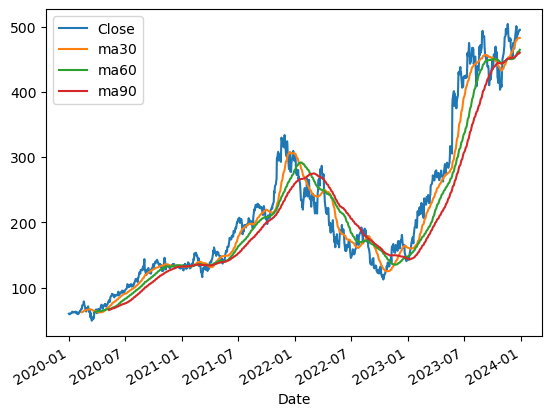

In [36]:
import matplotlib.pyplot as plt
plt.ion()

df.assign(
    ma30=df["Close"].rolling(30).mean().astype(pd.Float64Dtype()),
    ma60=df["Close"].rolling(60).mean().astype(pd.Float64Dtype()),
    ma90=df["Close"].rolling(90).mean().astype(pd.Float64Dtype()),
).plot()

In [37]:
df.groupby(pd.Grouper(freq="YS")).expanding().agg(
    ["min", "max", "mean"]
)

Close                        
                              min         max        mean
Date       Date                                          
2020-01-01 2020-01-02   59.977501   59.977501   59.977501
           2020-01-03   59.017502   59.977501   59.497501
           2020-01-06   59.017502   59.977501   59.420001
           2020-01-07   59.017502   59.982498   59.560625
           2020-01-08   59.017502   60.095001   59.667500
...                           ...         ...         ...
2023-01-01 2023-12-22  142.649994  504.089996  363.600610
           2023-12-26  142.649994  504.089996  364.123644
           2023-12-27  142.649994  504.089996  364.648024
           2023-12-28  142.649994  504.089996  365.172410
           2023-12-29  142.649994  504.089996  365.692600

[1006 rows x 3 columns]

<Axes: xlabel='Date'>

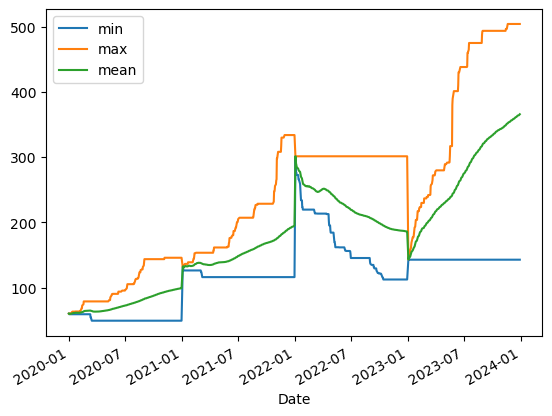

In [38]:
df.groupby(pd.Grouper(freq="YS")).expanding().agg(
    ["min", "max", "mean"]
).droplevel(axis=1, level=0).reset_index(level=0, drop=True).plot()

<Axes: xlabel='Date'>

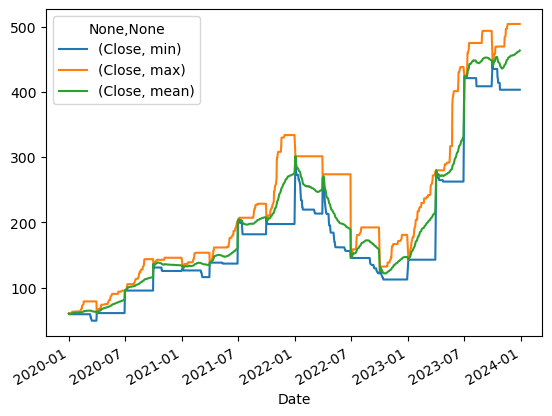

In [39]:
df.groupby(pd.Grouper(freq="QS")).expanding().agg(
    ["min", "max", "mean"]
).reset_index(level=0, drop=True).plot()

<Axes: xlabel='Date'>

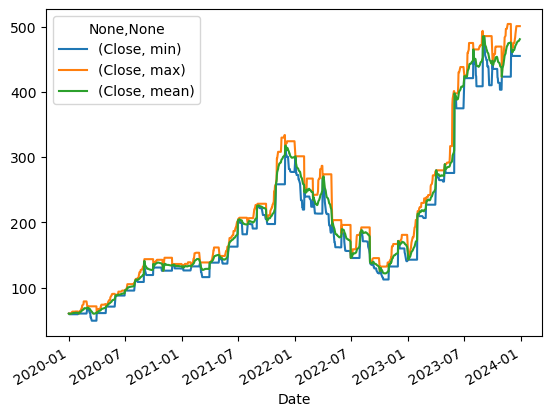

In [40]:
df.groupby(pd.Grouper(freq="MS")).expanding().agg(
    ["min", "max", "mean"]
).reset_index(level=0, drop=True).plot()

### Selecting the highest rated movies by year

In [42]:
df = pd.read_csv(
    "../data/movie.csv",
    usecols=["movie_title", "title_year", "imdb_score"],
    dtype_backend="numpy_nullable",
)

df

,movie_title,title_year,imdb_score
0,Avatar,2009.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Spectre,2015.0,6.8
3,The Dark Knight Rises,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens,<NA>,7.1
...,...,...,...
4911,Signed Sealed Delivered,2013.0,7.7
4912,The Following,<NA>,7.5
4913,A Plague So Pleasant,2013.0,6.3
4914,Shanghai Calling,2012.0,6.3


In [43]:
df["title_year"] = df["title_year"].astype(pd.Int16Dtype())
df.head(3)

,movie_title,title_year,imdb_score
0,Avatar,2009,7.9
1,Pirates of the Caribbean: At World's End,2007,7.1
2,Spectre,2015,6.8


In [44]:
df.sort_values(["title_year", "imdb_score"]).groupby(
    "title_year"
)[["movie_title"]].agg(top_rated_movie=pd.NamedAgg("movie_title", "last"))

,top_rated_movie
title_year,
1916,Intolerance: Love's Struggle Throughout the Ages
1920,Over the Hill to the Poorhouse
1925,The Big Parade
1927,Metropolis
1929,Pandora's Box
...,...
2012,Django Unchained
2013,"Batman: The Dark Knight Returns, Part 2"
2014,Butterfly Girl


In [45]:
df.set_index("movie_title").groupby("title_year").agg(
    top_rated_movie=pd.NamedAgg("imdb_score", "idxmax")
)

,top_rated_movie
title_year,
1916,Intolerance: Love's Struggle Throughout the Ages
1920,Over the Hill to the Poorhouse
1925,The Big Parade
1927,Metropolis
1929,Pandora's Box
...,...
2012,The Dark Knight Rises
2013,"Batman: The Dark Knight Returns, Part 2"
2014,Queen of the Mountains


In [46]:
df[df["movie_title"].isin({
    "Django Unchained",
    "The Dark Knight Rises",
    "Butterfly Girl",
    "Queen of the Mountains",
})]

,movie_title,title_year,imdb_score
3,The Dark Knight Rises,2012,8.5
293,Django Unchained,2012,8.5
4369,Queen of the Mountains,2014,8.7
4804,Butterfly Girl,2014,8.7


In [47]:
def top_rated(df: pd.DataFrame):
    top_rating = df["imdb_score"].max()
    top_rated = df[df["imdb_score"] == top_rating]["movie_title"].unique()

    if len(top_rated) == 1:
        return top_rated[0]
    else:
        return top_rated

df.groupby("title_year").apply(
    top_rated, include_groups=False
).to_frame().rename(columns={0: "top_rated_movie(s)"})

,top_rated_movie(s)
title_year,
1916,Intolerance: Love's Struggle Throughout the Ages
1920,Over the Hill to the Poorhouse
1925,The Big Parade
1927,Metropolis
1929,Pandora's Box
...,...
2012,"[The Dark Knight Rises, Django Unchained]"
2013,"Batman: The Dark Knight Returns, Part 2"
2014,"[Queen of the Mountains, Butterfly Girl]"
